In [2]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


**Upload Dataset**

In [3]:
#Upload UNSD country codes
df_codes = pd.read_csv('C:/Users/antar/Downloads/UNSD — Methodology.csv', sep=";")
df_codes.tail()

# Some countries have commas in the name

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Wallis and Futuna Islands,876,WF,WLF,NaN,NaN,NaN


In [4]:
#upload UN General Debate Corpus and Speeches

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "C:/Users/antar/Downloads/UN General Debate Corpus/TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename),encoding="utf8") as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [5]:
#upload happiness data
happinessdataframe = pd.read_excel('C:/Users/antar/Downloads/DataForTable2.1WHR2023.xls', index_col=[0,1]) 

In [6]:
#Read in conflict data from Worldbank 

df_conflict_WB = pd.read_excel('C:/Users/antar/Downloads/time_series_short_new_0.xls')
df_conflict_WB

,gwno,country,year,ongoing,gwarea_tot,gwsum_bestdeaths,gwsum_best_sb,gwshare_confl,gwpop,gwpop_confl,gwpopshare_confl,maxintensity,maxcumulativeintensity,peaceyears,peaceyearshigh,postconflict,pop_affected,area_affected
0,2,United States of America,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN,NaN
1,2,United States of America,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN
2,2,United States of America,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21.0,NaN,NaN,NaN
3,2,United States of America,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN
4,2,United States of America,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,990,American Samoa,2012,0.0,2948.588623,0.0,0.0,NaN,170679.406250,0.0,NaN,NaN,NaN,12.0,12.0,0.0,NaN,NaN
5012,990,American Samoa,2013,0.0,2948.588623,0.0,0.0,NaN,172006.593750,0.0,NaN,NaN,NaN,13.0,13.0,0.0,NaN,NaN
5013,990,American Samoa,2014,0.0,2948.588623,0.0,0.0,NaN,173333.796875,0.0,NaN,NaN,NaN,14.0,14.0,0.0,NaN,NaN
5014,990,American Samoa,2015,0.0,2948.588623,0.0,0.0,NaN,174660.984375,0.0,NaN,NaN,NaN,15.0,15.0,0.0,NaN,NaN


In [7]:
#reshape df so it will match happiness and conflict dataframe
df_conflict_WB['peace_war'] = np.where(df_conflict_WB['peaceyears'].isna(), 1, 0)
df_conflict_WB.loc[df_conflict_WB['peaceyears'] == 0, 'peace_war'] = 1
df_conflict_WB.rename(columns={'country': 'Country or Area', 'year': 'Year'}, inplace=True)
df_conflict_WB

,gwno,Country or Area,Year,ongoing,gwarea_tot,gwsum_bestdeaths,gwsum_best_sb,gwshare_confl,gwpop,gwpop_confl,gwpopshare_confl,maxintensity,maxcumulativeintensity,peaceyears,peaceyearshigh,postconflict,pop_affected,area_affected,peace_war
0,2,United States of America,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,NaN,NaN,NaN,0
1,2,United States of America,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,NaN,NaN,NaN,0
2,2,United States of America,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21.0,NaN,NaN,NaN,0
3,2,United States of America,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,0
4,2,United States of America,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,23.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,990,American Samoa,2012,0.0,2948.588623,0.0,0.0,NaN,170679.406250,0.0,NaN,NaN,NaN,12.0,12.0,0.0,NaN,NaN,0
5012,990,American Samoa,2013,0.0,2948.588623,0.0,0.0,NaN,172006.593750,0.0,NaN,NaN,NaN,13.0,13.0,0.0,NaN,NaN,0
5013,990,American Samoa,2014,0.0,2948.588623,0.0,0.0,NaN,173333.796875,0.0,NaN,NaN,NaN,14.0,14.0,0.0,NaN,NaN,0
5014,990,American Samoa,2015,0.0,2948.588623,0.0,0.0,NaN,174660.984375,0.0,NaN,NaN,NaN,15.0,15.0,0.0,NaN,NaN,0


**Merge all data frames to get final dataframe**

In [8]:
# Merge UN Speeches and Country Codes
df_un_merged =  pd.merge(df_codes, df_speech, how="right", on="ISO-alpha3 Code")[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
df_un_merged = df_un_merged.set_index(['Year', 'ISO-alpha3 Code'])
df_un_merged

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   
...                              ...         ...   
2020 WSM                       Samoa     Oceania   
     YEM                       Yemen        Asia   
     ZAF                South Africa      Africa   
     ZMB                      Zambia      Africa   
     ZWE                    Zimbabwe      Africa   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   
...                                               ...   
2020 WSM                                    Polynesia   
     YEM                                 Western Asia   
     ZAF                           Sub-Saharan Africa   
     ZMB                           Sub-Saharan Africa   
     ZWE                           Sub-Saharan Africa   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 ALB                                         NaN       25   
     ARG                                         NaN       25   
     AUS                                         NaN       25   
     AUT                                         NaN       25   
     BEL                                         NaN       25   
...                                              ...      ...   
2020 WSM                                         NaN       75   
     YEM                                           x       75   
     ZAF                                         NaN       75   
     ZMB                                           x       75   
     ZWE                                         NaN       75   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...  
...                                                                 ...  
2020 WSM              Mr. President,\nDistinguished delegates,\nLadi...  
     YEM              In the name of God the Merciful and the Compas...  
     ZAF              President of the General Assembly, Secretary-G...  
     ZMB              Your excellency Mr. Volkan Bozkir, President o...  
     ZWE              Your Excellency, Ambassador Volkan Bozkir, Pre...  

[8481 rows x 6 columns]

In [9]:
# Add a new column "Peace_Count" with the counts of "peace" in each speech
df_un_merged["Peace_Count"] = df_un_merged["Speech"].str.count("peace")
df_un_merged= df_un_merged.reset_index()
df_un_merged
# add frequency of word 'security' as column

df_un_merged["Security"] = df_un_merged["Speech"].str.count("security")
df_un_merged

,Year,ISO-alpha3 Code,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech,Peace_Count,Security
0,1970,ALB,Albania,Europe,Southern Europe,NaN,25,33: May I first convey to our President the co...,39,24
1,1970,ARG,Argentina,Americas,Latin America and the Caribbean,NaN,25,177.\t : It is a fortunate coincidence that pr...,17,9
2,1970,AUS,Australia,Oceania,Australia and New Zealand,NaN,25,100.\t It is a pleasure for me to extend to y...,24,6
3,1970,AUT,Austria,Europe,Western Europe,NaN,25,155.\t May I begin by expressing to Ambassado...,24,8
4,1970,BEL,Belgium,Europe,Western Europe,NaN,25,"176. No doubt each of us, before coming up to ...",7,15
...,...,...,...,...,...,...,...,...,...,...
8476,2020,WSM,Samoa,Oceania,Polynesia,NaN,75,"Mr. President,\nDistinguished delegates,\nLadi...",6,5
8477,2020,YEM,Yemen,Asia,Western Asia,x,75,In the name of God the Merciful and the Compas...,7,1
8478,2020,ZAF,South Africa,Africa,Sub-Saharan Africa,NaN,75,"President of the General Assembly, Secretary-G...",7,3
8479,2020,ZMB,Zambia,Africa,Sub-Saharan Africa,x,75,"Your excellency Mr. Volkan Bozkir, President o...",5,0


In [10]:
#Merge Speech with Conflict dataset
df_speech_conflict = df_un_merged.merge(df_conflict_WB[['Country or Area', 'Year', 'peace_war']], how ='left')

In [11]:
#Merge happiness dataframe with speech and conflict dataset
df_final_conflict_WB = pd.merge(df_speech_conflict, happinessdataframe, left_on=['Country or Area', 'Year'], right_on=['Country name', 'year'])
df_final_conflict_WB

,Year,ISO-alpha3 Code,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech,Peace_Count,Security,peace_war,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,AUS,Australia,Oceania,Australia and New Zealand,NaN,60,Australia is a founding\nMember of the United ...,1,5,0.0,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
1,2005,BEL,Belgium,Europe,Western Europe,NaN,60,"Allow me to congratulate you most warmly, Sir,...",5,6,0.0,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380
2,2005,BRA,Brazil,Americas,Latin America and the Caribbean,NaN,60,I should like\nto extend my warmest congratula...,7,4,0.0,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780
3,2005,CAN,Canada,Americas,Northern America,NaN,60,The\nsixtieth anniversary of the United Nation...,2,3,0.0,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278
4,2005,CZE,Czechia,Europe,Eastern Europe,NaN,60,Let me begin by\ncongratulating Mr. Eliasson o...,2,5,NaN,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2020,URY,Uruguay,Americas,Latin America and the Caribbean,NaN,75,"President of the General Assembly, Ambassador ...",9,4,NaN,6.309681,9.990978,0.921070,67.500000,0.907762,-0.091452,0.491008,0.720521,0.264692
1679,2020,UZB,Uzbekistan,Asia,Central Asia,NaN,75,DISTINGUISHED PRESIDENT VOLKAN BOZKIR!\nDISTIN...,4,3,NaN,5.841930,8.901669,0.849565,65.000000,0.928216,0.193077,0.642044,0.677927,0.278509
1680,2020,ZAF,South Africa,Africa,Sub-Saharan Africa,NaN,75,"President of the General Assembly, Secretary-G...",7,3,NaN,4.946801,9.458443,0.891050,56.724998,0.756946,-0.027119,0.912407,0.760584,0.294276
1681,2020,ZMB,Zambia,Africa,Sub-Saharan Africa,x,75,"Your excellency Mr. Volkan Bozkir, President o...",5,0,NaN,4.837992,8.065784,0.766872,54.825001,0.750422,0.057657,0.809750,0.679043,0.344526


In [12]:
# Checking missing values
#these exist because we merged with happiness dataframe and there are 
# countries that are not part of the original UN speech dataset or happiness dataframe 
#or there is data from when 
missing_values = df_final_conflict_WB.isna().sum()
print(missing_values)

Year                                   0
ISO-alpha3 Code                        0
Country or Area                        0
Region Name                            0
Sub-region Name                        0
Least Developed Countries (LDC)     1334
Session                                0
Speech                                 0
Peace_Count                            0
Security                               0
peace_war                            567
Life Ladder                            0
Log GDP per capita                     5
Social support                        10
Healthy life expectancy at birth       9
Freedom to make life choices          24
Generosity                            48
Perceptions of corruption             99
Positive affect                       21
Negative affect                       13
dtype: int64


In [13]:
df_final_conflict_WB

,Year,ISO-alpha3 Code,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech,Peace_Count,Security,peace_war,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,AUS,Australia,Oceania,Australia and New Zealand,NaN,60,Australia is a founding\nMember of the United ...,1,5,0.0,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
1,2005,BEL,Belgium,Europe,Western Europe,NaN,60,"Allow me to congratulate you most warmly, Sir,...",5,6,0.0,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380
2,2005,BRA,Brazil,Americas,Latin America and the Caribbean,NaN,60,I should like\nto extend my warmest congratula...,7,4,0.0,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780
3,2005,CAN,Canada,Americas,Northern America,NaN,60,The\nsixtieth anniversary of the United Nation...,2,3,0.0,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278
4,2005,CZE,Czechia,Europe,Eastern Europe,NaN,60,Let me begin by\ncongratulating Mr. Eliasson o...,2,5,NaN,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2020,URY,Uruguay,Americas,Latin America and the Caribbean,NaN,75,"President of the General Assembly, Ambassador ...",9,4,NaN,6.309681,9.990978,0.921070,67.500000,0.907762,-0.091452,0.491008,0.720521,0.264692
1679,2020,UZB,Uzbekistan,Asia,Central Asia,NaN,75,DISTINGUISHED PRESIDENT VOLKAN BOZKIR!\nDISTIN...,4,3,NaN,5.841930,8.901669,0.849565,65.000000,0.928216,0.193077,0.642044,0.677927,0.278509
1680,2020,ZAF,South Africa,Africa,Sub-Saharan Africa,NaN,75,"President of the General Assembly, Secretary-G...",7,3,NaN,4.946801,9.458443,0.891050,56.724998,0.756946,-0.027119,0.912407,0.760584,0.294276
1681,2020,ZMB,Zambia,Africa,Sub-Saharan Africa,x,75,"Your excellency Mr. Volkan Bozkir, President o...",5,0,NaN,4.837992,8.065784,0.766872,54.825001,0.750422,0.057657,0.809750,0.679043,0.344526


In [14]:
#numerical features

num_cols_WB = ['Security','Peace_Count', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'peace_war']             

In [15]:
df_numerical_WB = df_final_conflict_WB[num_cols_WB]

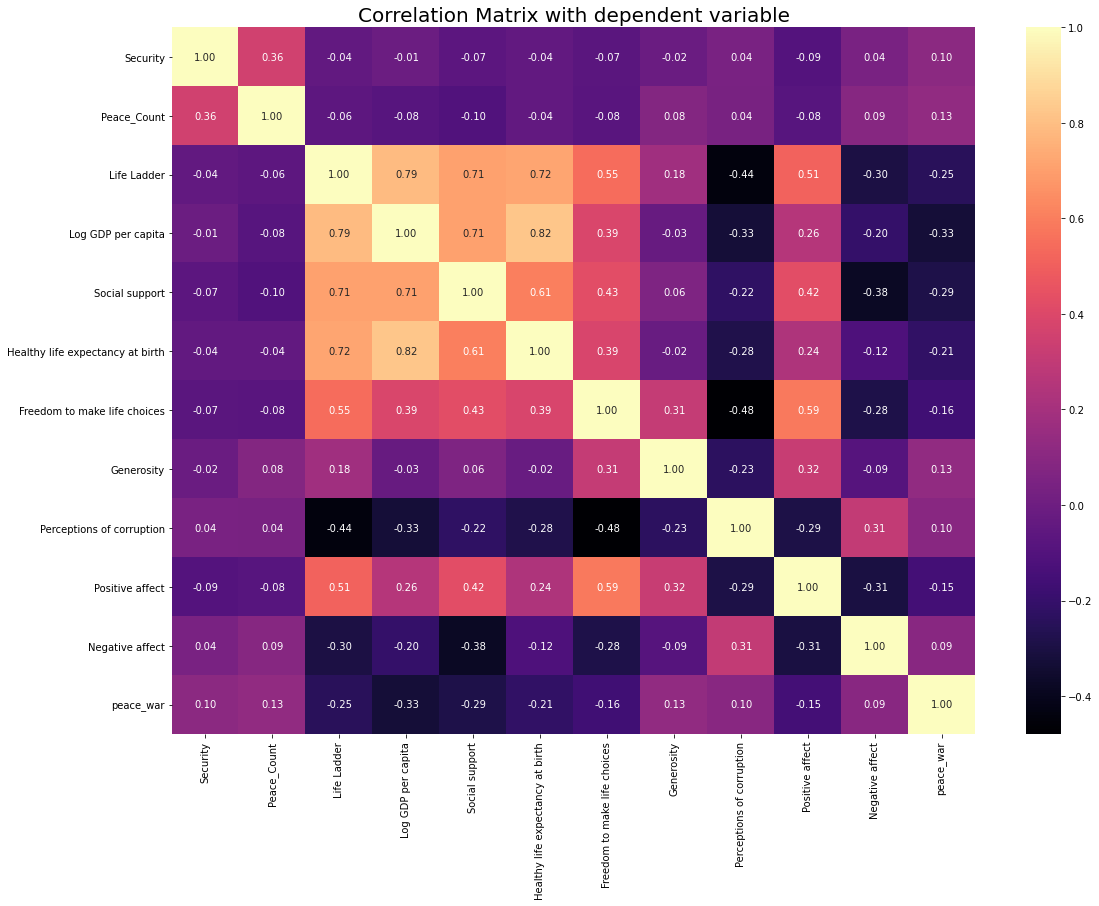

In [16]:
# Correlation Matrix with dependent variable
import seaborn as sns

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_final_conflict_WB[num_cols_WB].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix with dependent variable", fontsize=20)
plt.show()

**GOOOD UNTILL HERE, NEEDS TO BE RESHUFFLED**

In [72]:
nopeace= df_final_conflict_WB[df_final_conflict_WB['peace_war']>0]
print(nopeace)

Empty DataFrame
Columns: [Year, ISO-alpha3 Code, Country or Area, Region Name, Sub-region Name, Least Developed Countries (LDC), Session, Speech, Peace_Count, Security, peace_war, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


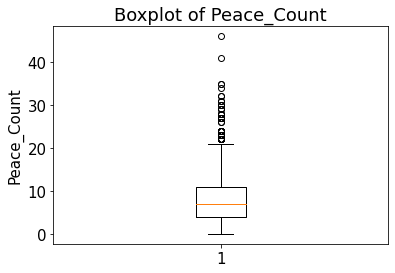

In [60]:
# outlier code starts here
plt.boxplot(df_final_conflict_WB['Peace_Count'])
plt.ylabel('Peace_Count')
plt.title('Boxplot of Peace_Count')
plt.show()

In [61]:
# the numbers of outliers

Peace_Count_index = df_final_conflict_WB['Peace_Count'] > 30 # tested with multiple numbers
print(len(df_final_conflict_WB['Peace_Count'][Peace_Count_index]))

9


In [62]:
peace_array_no_outliers = df_final_conflict_WB['Peace_Count'].values
q1 = np.percentile(df_final_conflict_WB['Peace_Count'], 25)
q3 = np.percentile(df_final_conflict_WB['Peace_Count'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_final_conflict_WB = df_final_conflict_WB[(peace_array_no_outliers >= lower_bound) & (peace_array_no_outliers <= upper_bound)]

print(df_final_conflict_WB)

      Year ISO-alpha3 Code Country or Area Region Name  \
0     2005             AUS       Australia     Oceania   
1     2005             BEL         Belgium      Europe   
2     2005             BRA          Brazil    Americas   
3     2005             CAN          Canada    Americas   
4     2005             CZE         Czechia      Europe   
...    ...             ...             ...         ...   
1678  2020             URY         Uruguay    Americas   
1679  2020             UZB      Uzbekistan        Asia   
1680  2020             ZAF    South Africa      Africa   
1681  2020             ZMB          Zambia      Africa   
1682  2020             ZWE        Zimbabwe      Africa   

                      Sub-region Name Least Developed Countries (LDC)  \
0           Australia and New Zealand                             NaN   
1                      Western Europe                             NaN   
2     Latin America and the Caribbean                             NaN   
3          

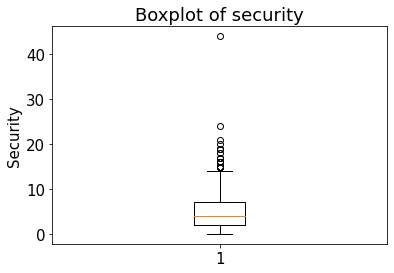

In [63]:
# outliers of security
plt.boxplot(df_final_conflict_WB['Security'])
plt.ylabel('Security')
plt.title('Boxplot of security')
plt.show()




In [64]:
# the numbers of outliers

security_index = df_final_conflict_WB['Security'] > 15 # above 20 there's only 1 outlier
print(len(df_final_conflict_WB['Security'][security_index]))

security_array_no_outliers = df_final_conflict_WB['Security'].values
q1 = np.percentile(df_final_conflict_WB['Security'], 25)
q3 = np.percentile(df_final_conflict_WB['Security'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_final_conflict_WB = df_final_conflict_WB[(security_array_no_outliers >= lower_bound) & (security_array_no_outliers <= upper_bound)]

print(df_final_conflict_WB)

15
      Year ISO-alpha3 Code Country or Area Region Name  \
0     2005             AUS       Australia     Oceania   
1     2005             BEL         Belgium      Europe   
2     2005             BRA          Brazil    Americas   
3     2005             CAN          Canada    Americas   
4     2005             CZE         Czechia      Europe   
...    ...             ...             ...         ...   
1678  2020             URY         Uruguay    Americas   
1679  2020             UZB      Uzbekistan        Asia   
1680  2020             ZAF    South Africa      Africa   
1681  2020             ZMB          Zambia      Africa   
1682  2020             ZWE        Zimbabwe      Africa   

                      Sub-region Name Least Developed Countries (LDC)  \
0           Australia and New Zealand                             NaN   
1                      Western Europe                             NaN   
2     Latin America and the Caribbean                             NaN   
3       

In [65]:
gdp_index = df_final_conflict_WB['Log GDP per capita'] > 11 # above 20 there's only 1 outlier
print(len(df_final_conflict_WB['Log GDP per capita'][gdp_index]))

gdp_array_no_outliers = df_final_conflict_WB['Log GDP per capita'].values
q1 = np.percentile(df_final_conflict_WB['Log GDP per capita'], 25)
q3 = np.percentile(df_final_conflict_WB['Log GDP per capita'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_final_conflict_WB = df_final_conflict_WB[(gdp_array_no_outliers >= lower_bound) & (gdp_array_no_outliers <= upper_bound)]

print(df_final_conflict_WB)

66
Empty DataFrame
Columns: [Year, ISO-alpha3 Code, Country or Area, Region Name, Sub-region Name, Least Developed Countries (LDC), Session, Speech, Peace_Count, Security, peace_war, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [66]:
pw_index = df_final_conflict_WB['peace_war'] > 0 # no outliers?? also nothing greater than 0??

print(len(df_final_conflict_WB['peace_war'][pw_index]))




# gdp_array_no_outliers = df_final_conflict_WB['Log GDP per capita'].values
# q1 = np.percentile(df_final_conflict_WB['Log GDP per capita'], 25)
# q3 = np.percentile(df_final_conflict_WB['Log GDP per capita'], 75)
# iqr = q3 - q1
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)

# df_clean = df_final_conflict_WB[(gdp_array_no_outliers >= lower_bound) & (gdp_array_no_outliers <= upper_bound)]

# print(df_clean)

0


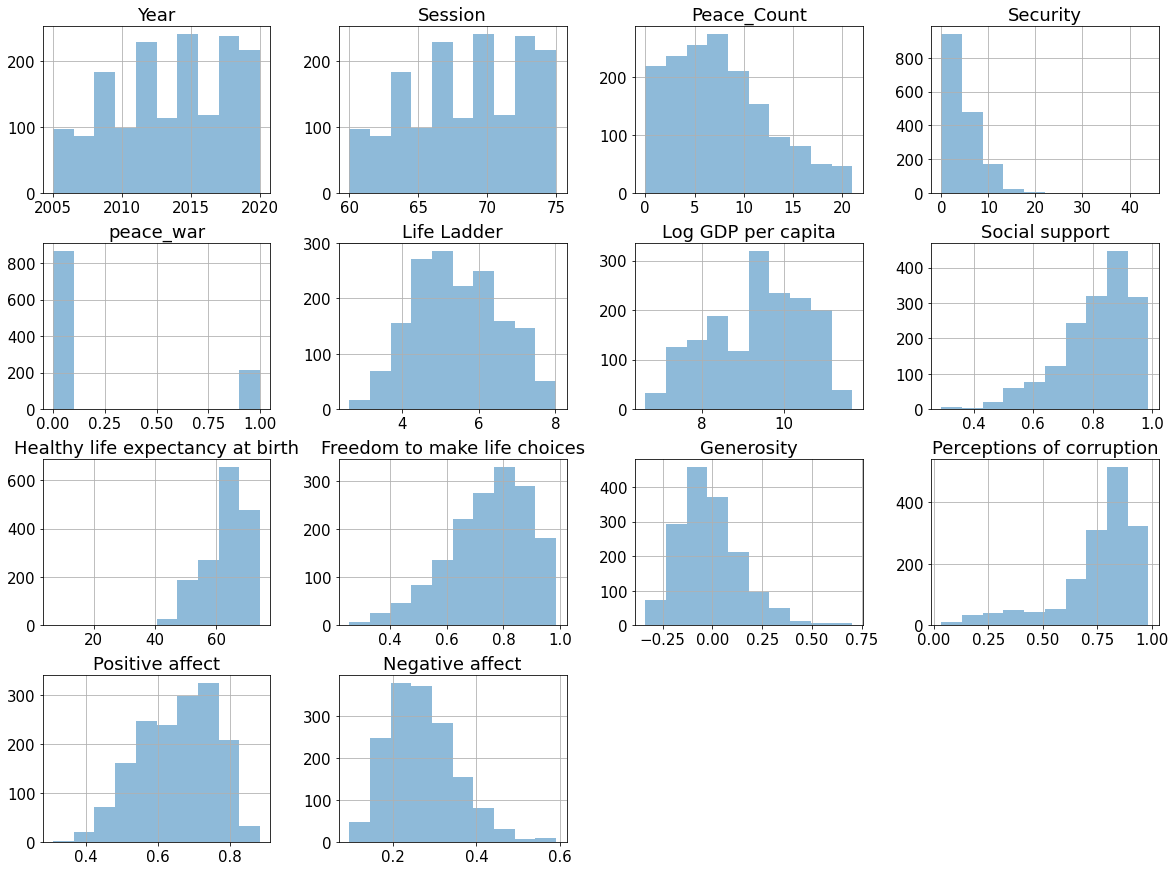

In [35]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
pyplot.rcParams['font.size'] = 15
df_clean.hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [53]:
# adding normalization/ scaling
# feature encoding: transfer categorical data in to numerical
print(df_clean['Life Ladder'].unique())

[]


In [18]:
# Calculate medians for the specified variables
median_spendpercentageGDP = df_final_conflict_WB['Spend in % of GDP'].median()
median_loggdppercapita = df_final_conflict_WB['Log GDP per capita'].median()
median_socialsupport = df_final_conflict_WB['Social support'].median()
median_freedomtomakelifechoices = df_final_conflict_WB['Freedom to make life choices'].median()
median_generosity = df_final_conflict_WB['Generosity'].median()
median_perceptionsofcorruption = df_final_conflict_WB['Perceptions of corruption'].median()
median_positiveaffect = df_final_conflict_WB['Positive affect'].median()
median_negativeaffect = df_final_conflict_WB['Negative affect'].median()

# Fill missing values for each variable with its respective median
df_final_conflict_WB['Spend in % of GDP'].fillna(median_spendpercentageGDP, inplace=True)
df_final_conflict_WB['Log GDP per capita'].fillna(median_loggdppercapita, inplace=True)
df_final_conflict_WB['Social support'].fillna(median_socialsupport, inplace=True)
df_final_conflict_WB['Freedom to make life choices'].fillna(median_freedomtomakelifechoices, inplace=True)
df_final_conflict_WB['Generosity'].fillna(median_generosity, inplace=True)
df_final_conflict_WB['Perceptions of corruption'].fillna(median_perceptionsofcorruption, inplace=True)
df_final_conflict_WB['Positive affect'].fillna(median_positiveaffect, inplace=True)
df_final_conflict_WB['Negative affect'].fillna(median_negativeaffect, inplace=True)


KeyError: 'Spend in % of GDP'

In [19]:
df_final_conflict_WB.isna().sum()

Year                                   0
ISO-alpha3 Code                        0
Country or Area                        0
Region Name                            0
Sub-region Name                        0
Least Developed Countries (LDC)     1334
Session                                0
Speech                                 0
Peace_Count                            0
Security                               0
peace_war                            567
Life Ladder                            0
Log GDP per capita                     5
Social support                        10
Healthy life expectancy at birth       9
Freedom to make life choices          24
Generosity                            48
Perceptions of corruption             99
Positive affect                       21
Negative affect                       13
dtype: int64

In [ ]:
# Initialize a dictionary to store the counts for each column of 'xxx', which takes into account countries that are not yet independent
# should also add to the code to check for '...' and 'XXX', all results in 0 
counts = {}

# Iterate through columns
for column in df_final_conflict_WB.columns:
    # Count the occurrences of 'xxx' in the current column
    count_of_xxx = (df_final_conflict_WB[column] == '...').sum()
    
    # Store the count in the dictionary
    counts[column] = count_of_xxx

# Print the counts for each column
for column, count in counts.items():
    print(f"Count of 'xxx' in {column}: {count}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named df_final_conflict_WB
X = df_final_conflict_WB[['Log GDP per capita', 'Security', 'Peace_Count']]
y = df_final_conflict_WB['peace_war_y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
